In [1]:
# %%html
# <style>
#     /* Jupyter */
#     .rendered_html table,
#     /* Jupyter Lab*/
#     div[data-mime-type="text-markdown"] table {
#         margin-left: 0
#     }
# </style>

In [2]:
# import libraries for computations
import numpy as np
import pandas as pd
import scipy.stats as stats

In [3]:
# import libraries for visualizations
import matplotlib.pyplot as plt

from matplotlib.ticker import PercentFormatter

%matplotlib inline

import seaborn as sns

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import cufflinks as cf

import plotly.graph_objects as go
# For offline use
cf.go_offline()

import chart_studio.plotly as py

# For Notebooks
init_notebook_mode(connected=True)

In [4]:
#from IPython.display import Markdown as md

In [5]:
class SeabornFig2Grid():
    '''
    Code assimilated from: https://stackoverflow.com/questions/35042255/how-to-plot-multiple-seaborn-jointplot-in-subplot
    '''
    
    def __init__(self, seaborngrid, fig,  subplot_spec):
        self.fig = fig
        self.sg = seaborngrid
        self.subplot = subplot_spec
        if isinstance(self.sg, sns.axisgrid.FacetGrid) or \
        isinstance(self.sg, sns.axisgrid.PairGrid):
            self._movegrid()
        elif isinstance(self.sg, sns.axisgrid.JointGrid):
            self._movejointgrid()
        self._finalize()

    def _movegrid(self):
        """ Move PairGrid or Facetgrid """
        self._resize()
        n = self.sg.axes.shape[0]
        m = self.sg.axes.shape[1]
        self.subgrid = gridspec.GridSpecFromSubplotSpec(n,m, subplot_spec=self.subplot)
        for i in range(n):
            for j in range(m):
                self._moveaxes(self.sg.axes[i,j], self.subgrid[i,j])

    def _movejointgrid(self):
        """ Move Jointgrid """
        h= self.sg.ax_joint.get_position().height
        h2= self.sg.ax_marg_x.get_position().height
        r = int(np.round(h/h2))
        self._resize()
        self.subgrid = gridspec.GridSpecFromSubplotSpec(r+1,r+1, subplot_spec=self.subplot)

        self._moveaxes(self.sg.ax_joint, self.subgrid[1:, :-1])
        self._moveaxes(self.sg.ax_marg_x, self.subgrid[0, :-1])
        self._moveaxes(self.sg.ax_marg_y, self.subgrid[1:, -1])

    def _moveaxes(self, ax, gs):
        #https://stackoverflow.com/a/46906599/4124317
        ax.remove()
        ax.figure=self.fig
        self.fig.axes.append(ax)
        self.fig.add_axes(ax)
        ax._subplotspec = gs
        ax.set_position(gs.get_position(self.fig))
        ax.set_subplotspec(gs)

    def _finalize(self):
        plt.close(self.sg.fig)
        self.fig.canvas.mpl_connect("resize_event", self._resize)
        self.fig.canvas.draw()

    def _resize(self, evt=None):
        self.sg.fig.set_size_inches(self.fig.get_size_inches())

In [6]:
def _plot_pareto_by(df_, group_by, column, plot_title):
    '''
    Code assimilated from: https://stackoverflow.com/questions/53577630/how-to-make-pareto-chart-in-python
    '''
    df = df_.groupby(group_by)[column].count().reset_index()
    df = df.sort_values(by=column,ascending=False)

    df["cumpercentage"] = df[column].cumsum()/df[column].sum()*100


    fig, ax = plt.subplots(figsize=(10,6))
    ax.bar(df[group_by], df[column], color="C0")
    ax2 = ax.twinx()
    ax2.plot(df[group_by], df["cumpercentage"], color="#b5001ccc", marker="D", ms=7)
    ax2.yaxis.set_major_formatter(PercentFormatter())

    ax.tick_params(axis="y", colors="#000000cc")
    ax2.tick_params(axis="y", colors="#b5001ccc")

    
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
        
    plt.grid(True)
    plt.title( plot_title, loc='left')
    plt.show()

In [7]:
# varia
# Set colormap equal to seaborns light green color palette
cm = sns.light_palette("green", as_cmap=True)

In [8]:
# def custom_boxplot(df_, columns, plot_title, plot_dim):
    
#     fig, axes = plt.subplots(nrows = plot_dim[0], ncols = plot_dim[1] , figsize=(10,6))

#     axes[0] = sns.boxplot(data = df_[0], x = columns[0], y = columns[1], color="C0", ax = axes[0])
#     axes[1] = sns.boxplot(data = df_[1], x = columns[0], y = columns[1], color="C0", ax= axes[1])
#     axes[0].grid(True)
#     axes[1].grid(True)
#     axes[0].set_title( plot_title[0], loc='left')
#     axes[1].set_title( plot_title[1], loc='left')
    
    
#     plt.tight_layout()
#     plt.show()

In [9]:
# data comes from (somewhat filtered down) 
# NASA Exoplanet Archive : https://exoplanetarchive.ipac.caltech.edu/docs/data.html 
# table: Planetary Systems Composite Data 
# TODO: check API for direct download from webpage
# read csv into DataFrame
df_Exoplanet = pd.read_csv('PSCompPars_2022.05.30_01.49.21.csv', comment = '#')

In [10]:
df_Exoplanet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5035 entries, 0 to 5034
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pl_name          5035 non-null   object 
 1   hostname         5035 non-null   object 
 2   sy_snum          5035 non-null   int64  
 3   sy_pnum          5035 non-null   int64  
 4   discoverymethod  5035 non-null   object 
 5   disc_year        5035 non-null   int64  
 6   pl_orbper        4867 non-null   float64
 7   pl_rade          5021 non-null   float64
 8   pl_bmasse        5012 non-null   float64
 9   pl_bmassprov     5035 non-null   object 
 10  pl_orbeccen      4393 non-null   float64
 11  st_spectype      1764 non-null   object 
 12  st_teff          4895 non-null   float64
 13  st_rad           4876 non-null   float64
 14  st_mass          5031 non-null   float64
 15  st_met           4719 non-null   float64
 16  st_metratio      4691 non-null   object 
 17  sy_dist       

# Simple preliminary data exploration before celaning

In [11]:
#df_Exoplanet.describe()

In [12]:
total_number_of_exoplanet = df_Exoplanet.count()[0]
avg_number_of_exoplanets_in_system = df_Exoplanet['sy_pnum'].mean()
median_numbe_of_exoplanets_in_system = df_Exoplanet['sy_pnum'].median()


closest_exoplanet = df_Exoplanet['sy_dist'].min()
median_exoplanet_distance = df_Exoplanet['sy_dist'].median()
farthest_exoplanet =  df_Exoplanet['sy_dist'].max()

smallest_exoplanet = df_Exoplanet['pl_rade'].min()
largest_exoplanet = df_Exoplanet['pl_rade'].max()

In [13]:
summary_dict = {'Values' : [total_number_of_exoplanet, 
                            avg_number_of_exoplanets_in_system,
                            median_numbe_of_exoplanets_in_system,
                            closest_exoplanet,
                            median_exoplanet_distance,
                            farthest_exoplanet,
                            smallest_exoplanet,
                            largest_exoplanet ]}
index_summary = ['Total number of confirmed Exoplanets', 
                 'Average number of exoplanets in the system',
                 'Median for number of exoplanets in the system',
                 'Closest exoplanet [pc]', 
                 'Median exoplanet distance from a Sun [pc]',
                 'The most distant exoplanet [pc]', 
                 'Smallest exoplanet detected [Earth radii]', 
                 'Largest exoplanet detected [Earth radii]']

In [14]:
# creating summary DataFrame
df_summary = pd.DataFrame(summary_dict)
df_summary.index = index_summary

In [15]:
df_summary.style.format({"Values": '{:.2f}'})

,Values
Total number of confirmed Exoplanets,5035.00
Average number of exoplanets in the system,1.76
Median for number of exoplanets in the system,1.00
Closest exoplanet [pc],1.30
Median exoplanet distance from a Sun [pc],443.07
The most distant exoplanet [pc],8500.00
Smallest exoplanet detected [Earth radii],0.30
Largest exoplanet detected [Earth radii],77.34


In [16]:
# md(f"<font size = '5'> Total number of confirmed Exoplanets: {total_number_of_exoplanet} </font>")
# md(f"<font size = '5'> Average number of exoplanets in system: {avg_number_of_exoplanets_in_system} </font>")
# md(f"<font size = '5'> Closest exoplanet: {closest_exoplanet} [pc] </font>")
# md(f"<font size = '5'> Most distant exoplanet: {farthest_exoplanet} [pc] </font>")
# md(f"<font size = '5'> Smallest exoplanet detected: {smallest_exoplanet} [Earth radii] </font>")
# md(f"<font size = '5'> Largest exoplanet detected: {largest_exoplanet} [Earth radii] </font>")

In [17]:
# quick look at dataframe
df_Exoplanet.head(2)

,pl_name,hostname,sy_snum,sy_pnum,discoverymethod,disc_year,pl_orbper,pl_rade,pl_bmasse,pl_bmassprov,pl_orbeccen,st_spectype,st_teff,st_rad,st_mass,st_met,st_metratio,sy_dist
0,11 Com b,11 Com,2,1,Radial Velocity,2007,326.03000,12.1,6165.6000,Msini,0.231,G8 III,4742.0,19.00,2.70,-0.35,[Fe/H],93.1846
1,11 UMi b,11 UMi,1,1,Radial Velocity,2009,516.21997,12.3,4684.8142,Msini,0.080,K4 III,4213.0,29.79,2.78,-0.02,[Fe/H],125.3210


# Adding new columns to dataframe 

In [18]:
# transforming discovery years to decades
def calc_decade(x):
    if x < 1990:
        decade = "1980s"
    elif (x >= 90) and (x < 2000):
        decade = "1990s"
    elif (x >= 2000) and (x < 2010):
        decade = "2000s"
    elif (x >= 2010) and (x < 2020):
        decade = "2010s"
    else: decade = "2020s"
    
    return decade

In [19]:
# classifying exoplanet by their radii
def simple_planet_class(x):
    '''
    Clasification after: http://dx.doi.org/10.3847/1538-4357/aab205
    Look also: https://tools.emac.gsfc.nasa.gov/EBC/#input_form
    '''
    # if x < 0.5:
    #     return 'Small Rocky'
    # elif (x >= 0.5) and (x <= 1.0):
    #     return 'Rocky'
    # elif (x > 1.0) and (x < 1.75):
    #     return 'Super-Earths'
    # elif (x >= 1.75) and (x < 3.5):
    #     return 'Sub-Neptunes'
    # elif (x >= 3.5) and (x < 6.0):
    #     return 'Sub-Jovians'
    # else:
    #     return 'Jovians' 
    
    if x <= 1.0:
        return 'Terrestrial'
    elif (x > 1.0) and (x < 1.75):
        return 'Super-Earth'
    elif (x >= 1.75) and (x < 3.5):
        return 'Sub-Neptune'
    elif (x >= 3.5) and (x < 6.0):
        return 'Sub-Jovian'
    else:
        return 'Jovian' 

In [20]:
# calculate compactness of host star
# function work on two columns
def calc_compactness(st_vec):
    '''
    Star compactness factor M/R in units of Sol_mass/Sol_radii
    st_vec[0] = st_mass
    st_vec[1] = st_radii
    '''
    
    return st_vec[0]/st_vec[1]

In [21]:
def describe_planet(x):
    # x - pandas series
    if x['sy_snum'] == 1.0:
        numstars = f"System contains {x['sy_snum']} star"
    else:
        numstars = f"System contains {x['sy_snum']} stars"
        
    if x['sy_pnum'] == 1.0:
        plnum = f"There is {x['sy_pnum']} confirmed exoplanet in there"
    else :
        plnum = f"There is {x['sy_pnum']} confirmed exoplanets in there"
        
    if x['pl_orbper'] > 1.0:
        plorb = f"Its orbital period is {x['pl_orbper']} days"
    else :
        plorb = f"Its orbital period is {x['pl_orbper']} day"
        
    
    list_of_characteristics = [f"Discovery year was {x['disc_year']}", 
                                   f"Host star is {x['hostname']}",
                                   f"Exoplanet was named {x['pl_name']}",
                                   numstars,
                                   plnum,
                                   f"Host star has {x['st_mass']} mas of the Sun", 
                                   f"System is {x['sy_dist']} parsecs [pc] from Sun",
                                   f"Planet has radius of {x['pl_rade']} Earth radii" , 
                                   plorb, 
                                   f"Exoplanet belongs to {x['pl_type']} class"]
    
    for item in list_of_characteristics:
        print(item)

In [22]:
df_Exoplanet['decade_of_discovery'] = df_Exoplanet['disc_year'].apply(calc_decade)
df_Exoplanet['pl_type'] = df_Exoplanet['pl_rade'].apply(simple_planet_class)
df_Exoplanet['st_compactness'] = df_Exoplanet[['st_mass','st_rad']].apply(calc_compactness, axis = 1)

In [23]:
df_Exoplanet.head(2)

,pl_name,hostname,sy_snum,sy_pnum,discoverymethod,disc_year,pl_orbper,pl_rade,pl_bmasse,pl_bmassprov,...,st_spectype,st_teff,st_rad,st_mass,st_met,st_metratio,sy_dist,decade_of_discovery,pl_type,st_compactness
0,11 Com b,11 Com,2,1,Radial Velocity,2007,326.03000,12.1,6165.6000,Msini,...,G8 III,4742.0,19.00,2.70,-0.35,[Fe/H],93.1846,2000s,Jovian,0.142105
1,11 UMi b,11 UMi,1,1,Radial Velocity,2009,516.21997,12.3,4684.8142,Msini,...,K4 III,4213.0,29.79,2.78,-0.02,[Fe/H],125.3210,2000s,Jovian,0.093320


Creating restricted dataframe containing columns only needed for conducted analysis

[//]: # "TODO learn more about dataframe view and copy"

In [24]:
# list names of columns and turn result to list
all_columns = df_Exoplanet.columns.tolist()

In [25]:
# list of columns to keep
columns_to_keep = ['pl_name', 'hostname', 'sy_snum', 'sy_pnum', 'discoverymethod','disc_year', 
                   'pl_rade', 'pl_orbper', 
                   'st_rad', 'st_mass', 'st_met', 'sy_dist', 
                   'decade_of_discovery', 'pl_type', 'st_compactness']

In [26]:
# creating list of columns to remove from dataframe
columns_mask = [ele for ele in all_columns if ele not in columns_to_keep]

In [27]:
df_Exoplanet_restrict = df_Exoplanet.drop(columns_mask, axis = 1 )

In [28]:
# removing duplicate rows
# find duplicate rows
duplicate_rows = df_Exoplanet_restrict[df_Exoplanet_restrict.duplicated()]
#duplicate_rows

# alternatively in this case we know that pl_name should be unique so we may check to see if thre are any duplicates
#df_Exoplanet_restrict['pl_name'].count() - df_Exoplanet_restrict['pl_name'].nunique()

In [29]:
# selecting first row and casting it to dictionary
#row_dict = df_Exoplanet_restrict.iloc[0].to_dict()
# appending row to DataFrame, sidenote cannot append duplicate row
#df_Exoplanet_restrict.append(row_dict, ignore_index=True)

In [30]:
# dropping rows with null values
df_Exoplanet_restrict.dropna(inplace = True)
df_Exoplanet_restrict.reset_index(inplace = True)
df_Exoplanet_restrict.drop('index', axis = 1, inplace = True)
df_Exoplanet_restrict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4676 entries, 0 to 4675
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   pl_name              4676 non-null   object 
 1   hostname             4676 non-null   object 
 2   sy_snum              4676 non-null   int64  
 3   sy_pnum              4676 non-null   int64  
 4   discoverymethod      4676 non-null   object 
 5   disc_year            4676 non-null   int64  
 6   pl_orbper            4676 non-null   float64
 7   pl_rade              4676 non-null   float64
 8   st_rad               4676 non-null   float64
 9   st_mass              4676 non-null   float64
 10  st_met               4676 non-null   float64
 11  sy_dist              4676 non-null   float64
 12  decade_of_discovery  4676 non-null   object 
 13  pl_type              4676 non-null   object 
 14  st_compactness       4676 non-null   float64
dtypes: float64(7), int64(3), object(5)
mem

In [31]:
df_Exoplanet_restrict.describe()

,sy_snum,sy_pnum,disc_year,pl_orbper,pl_rade,st_rad,st_mass,st_met,sy_dist,st_compactness
count,4676.000000,4676.000000,4676.000000,4.676000e+03,4676.000000,4676.000000,4676.000000,4676.000000,4676.000000,4676.000000
mean,1.097947,1.788067,2015.373182,8.627725e+04,5.298380,1.520265,0.984998,0.010856,558.791869,0.935480
std,0.332593,1.162974,4.133903,5.878798e+06,5.096335,3.655598,0.413423,0.180105,487.305007,0.211384
min,1.000000,1.000000,1989.000000,1.797190e-01,0.296000,0.110000,0.090000,-1.000000,3.202600,0.024764
25%,1.000000,1.000000,2014.000000,4.521068e+00,1.709000,0.790000,0.820000,-0.080000,150.188500,0.885246
50%,1.000000,1.000000,2016.000000,1.156951e+01,2.635000,0.960000,0.960000,0.020000,447.775500,0.990291
75%,1.000000,2.000000,2018.000000,3.860117e+01,9.766250,1.250000,1.100000,0.120000,848.254000,1.048780
max,4.000000,8.000000,2022.000000,4.020000e+08,30.488000,83.800000,10.940000,0.560000,4483.050000,2.500000


In [32]:
# since we work with the numerical data there is no need to spellcheck or to look for incorrect whitespaces

In [33]:
# exporting dataframe to Excel
#df_Exoplanet_restrict.to_excel('Exoplanet_exploration.xlsx')

In [34]:
# export dataframe to csv
#df_Exoplanet_restrict.to_csv('Exoplanet_exploration.csv')

# Exploring discovery history

<font size = '5'> First discovered exoplanet </font>

In [35]:
first_discovered = df_Exoplanet_restrict.iloc[df_Exoplanet_restrict['disc_year'].idxmin()]
first_discovered

pl_name                    HD 114762 b
hostname                     HD 114762
sy_snum                              2
sy_pnum                              1
discoverymethod        Radial Velocity
disc_year                         1989
pl_orbper                      83.9151
pl_rade                          12.44
st_rad                             1.2
st_mass                            0.8
st_met                           -0.72
sy_dist                        40.1949
decade_of_discovery              1980s
pl_type                         Jovian
st_compactness                0.666667
Name: 442, dtype: object

In [36]:
describe_planet(first_discovered)

Discovery year was 1989
Host star is HD 114762
Exoplanet was named HD 114762 b
System contains 2 stars
There is 1 confirmed exoplanet in there
Host star has 0.8 mas of the Sun
System is 40.1949 parsecs [pc] from Sun
Planet has radius of 12.44 Earth radii
Its orbital period is 83.9151 days
Exoplanet belongs to Jovian class


<font size = '5'> First discovered rocky Earth size exoplanet </font>

In [37]:
first_terrestial = df_Exoplanet_restrict.iloc[df_Exoplanet_restrict[df_Exoplanet_restrict['pl_type'] == 'Terrestrial']['disc_year'].idxmin()]
first_terrestial

pl_name                                     KOI-55 b
hostname                                      KOI-55
sy_snum                                            1
sy_pnum                                            2
discoverymethod        Orbital Brightness Modulation
disc_year                                       2011
pl_orbper                                   0.240104
pl_rade                                        0.759
st_rad                                           0.2
st_mass                                          0.5
st_met                                        -0.106
sy_dist                                      1231.02
decade_of_discovery                            2010s
pl_type                                  Terrestrial
st_compactness                                   2.5
Name: 1538, dtype: object

In [38]:
describe_planet(first_terrestial)

Discovery year was 2011
Host star is KOI-55
Exoplanet was named KOI-55 b
System contains 1 star
There is 2 confirmed exoplanets in there
Host star has 0.5 mas of the Sun
System is 1231.02 parsecs [pc] from Sun
Planet has radius of 0.759 Earth radii
Its orbital period is 0.240104 day
Exoplanet belongs to Terrestrial class


In [39]:
# creating list of unique values of given column
discovery_methods = df_Exoplanet_restrict['discoverymethod'].unique()

In [40]:
#discovery_methods

In [41]:
# separating each group of dataframe into dictionary for plotting
method_by_year = {}
for i,item in enumerate(discovery_methods):
    method_by_year[item] = df_Exoplanet_restrict.groupby(['discoverymethod','decade_of_discovery']).count().loc[discovery_methods[i]]['pl_name'].reset_index()

In [42]:
#ax = sns.catplot(data = method_by_year['Transit'], x = 'decade_of_discovery', y = 'pl_name', kind = 'bar')
#plt.ylabel('Number of discovered Exoplanet')

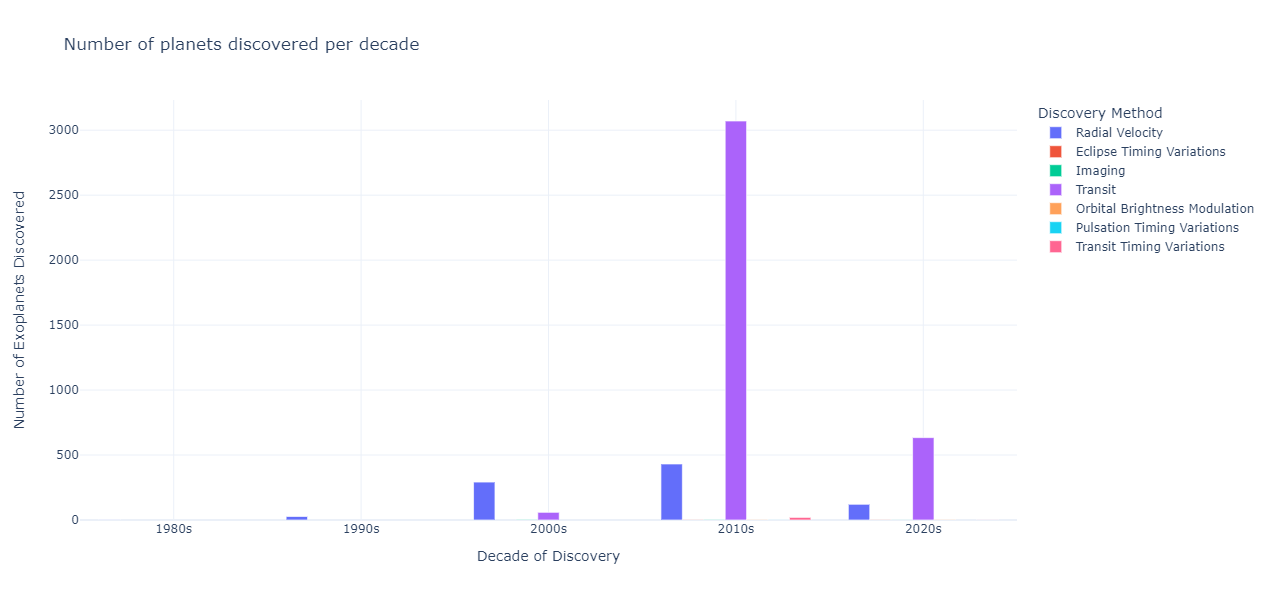

In [43]:
# plot the data
fig = go.Figure(layout={'template' : 'plotly_white',
                        #'plot_bgcolor' : 'white',
                        'xaxis':{'title':'Decade of Discovery', 'showgrid' : True},
                        'yaxis':{'title':'Number of Exoplanets Discovered', 'showgrid' : True},
                        'width' : 1000,
                        'height' : 600,
                        'legend' : {'title' : 'Discovery Method'}
                        })

for i in method_by_year:
    fig = fig.add_trace(go.Bar(x = method_by_year[i]["decade_of_discovery"],
                                   y = method_by_year[i]["pl_name"], 
                                   name = i))
fig.update_layout(title='Number of planets discovered per decade')
fig.show()

We see that most fruitful decade was 2010s with transit and radial velocity measurements methods of discovery of exoplanets.

# Exoplanet population exploration

In [44]:
# this make table below aligned to left, when uncomented
# %%html
# <style>
# table {float:left}
# </style>

<!-- | --- | Small Rocky | Rocky | Super-Earth | Sub-Neptunes | Sub-Jovians | Jovians |
| -- | --- | --- | --- | --- | --- | --- |
|Planet radii in units of Earth radii $$R_{Earth}$$| $$R < 0.5 R_{Earth}$$ | $$ 0.6 R_{Earth} \leq R \leq 1.0 R_{Earth} $$ | $$ 1.0 R_{Earth} < R \leq 1.75 R_{Earth} $$ | $$ 1.75 R_{Earth} \leq R < 3.5 R_{Earth} $$ | $$ 3.5 R_{Earth} \leq R < 6.0 R_{Earth}  $$ | $$ R > 6.0 R_{Earth}$$ | -->

<font size = '5'> Simple exoplanets classification </font>
<font size = '5'> (after: http://dx.doi.org/10.3847/1538-4357/aab205) </font>

<!-- | --- | Small Rocky | Rocky | Super-Earth | Sub-Neptunes | Sub-Jovians | Jovians |
| --- | --- | --- | --- | --- | --- | --- |
|Planet radii in units of Earth radii $$R_{Earth}$$| $$R < 0.5$$ | $$ 0.6 \leq R \leq 1.0$$ | $$ 1.0 < R \leq 1.75$$ | $$ 1.75 \leq R < 3.5$$ | $$ 3.5 \leq R < 6.0$$ | $$ R > 6.0$$ |<font size = '5'> First discovered rocky Earth size exoplanet </font> -->

| --- | Terrestial | Super-Earth | Sub-Neptune | Sub-Jovian | Jovian |
| --- | --- | --- | --- | --- | --- |
|Planet radii in units of Earth radii $$R_{Earth}$$| $$R \leq 1.0$$ | $$ 1.0 < R \leq 1.75$$ | $$ 1.75 \leq R < 3.5$$ | $$ 3.5 \leq R < 6.0$$ | $$ R > 6.0$$ |

Above classification is slightly simplified since we merged rocky and small rocky planets categories together. At the level of conducted analysis distinction between them is irrelevant. Moreover, number of small rocky planets is much smaller than rocky planets therefore they will not distort significantly statistics for rocky worlds.

In [45]:
no_small_rocky = df_Exoplanet_restrict[df_Exoplanet_restrict['pl_rade'] < 0.5].count()[0]
no_terrestial = df_Exoplanet_restrict[df_Exoplanet_restrict['pl_rade'] <= 1.0].count()[0]
no_rocky = no_terrestial - no_small_rocky

In [46]:
print(f"No. of small rocky planets {no_small_rocky}")
print(f"No. of rocky planets {no_rocky}")

No. of small rocky planets 5
No. of rocky planets 186


In [47]:
discovery_decade = df_Exoplanet_restrict['decade_of_discovery'].unique()

In [48]:
#discovery_decade

In [49]:
planet_by_decade = {}
for i,item in enumerate(discovery_decade):
    planet_by_decade[item] = df_Exoplanet_restrict.groupby(['decade_of_discovery', 'pl_type']).count().loc[discovery_decade[i]]['pl_name'].reset_index()


In [50]:
#planet_by_decade

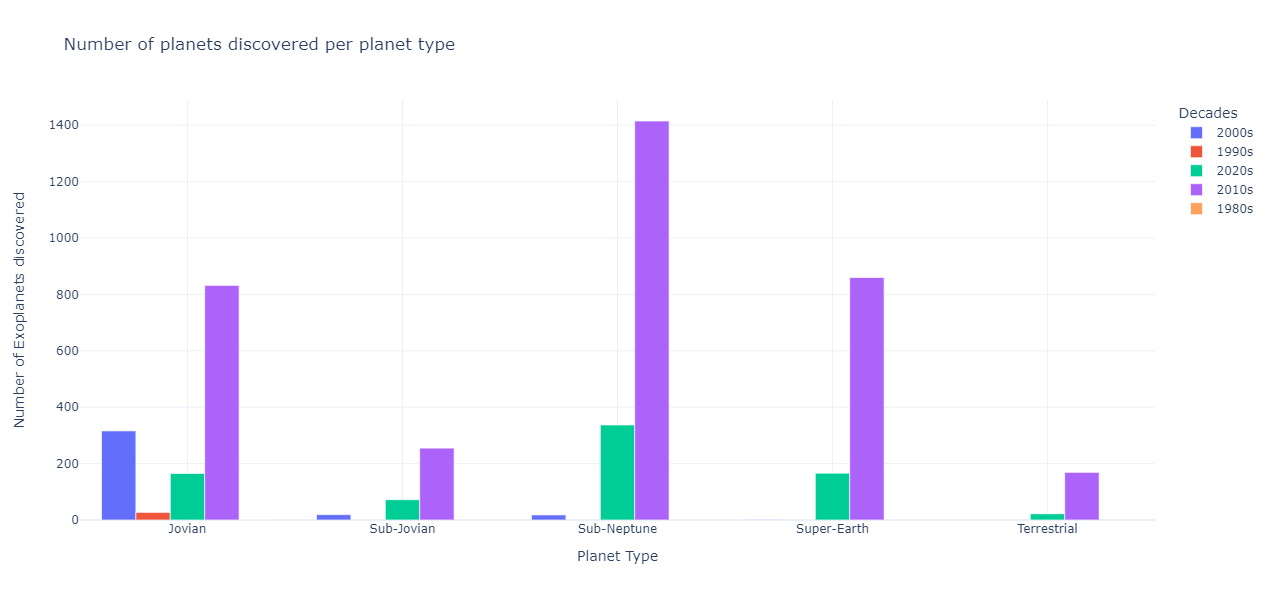

In [51]:
# plot the data
fig2 = go.Figure(layout={'template' : 'plotly_white',
                        #'plot_bgcolor' : 'white',
                        'xaxis':{'title':'Planet Type', 'showgrid' : True},
                        'yaxis':{'title':'Number of Exoplanets discovered', 'showgrid' : True},
                        'width' : 1000,
                        'height' : 600,
                        'legend' : {'title' : 'Decades'}
                        })

for i in planet_by_decade:
    fig2 = fig2.add_trace(go.Bar(x = planet_by_decade[i]["pl_type"],
                                   y = planet_by_decade[i]["pl_name"],
                                # text = planet_by_decade[i]['descritive_planet_size'],
                                   name = i))
fig2.update_layout(title='Number of planets discovered per planet type')
fig2.show()

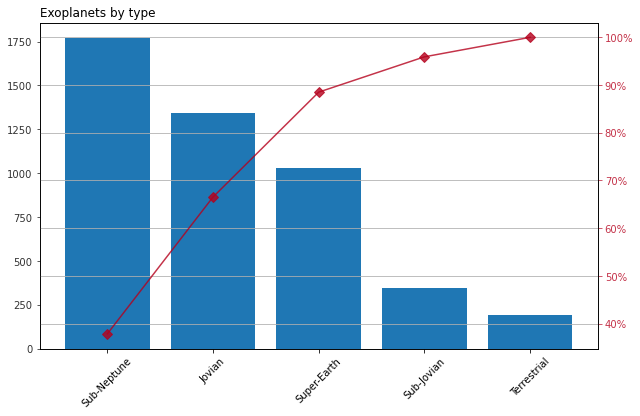

In [52]:
# number of exoplanets by type
_plot_pareto_by(df_Exoplanet_restrict,'pl_type','pl_rade', 'Exoplanets by type')

From the plot of the Pareto diagram above we see that most commons among discovered exoplanets are Sub-Neptunes with Jovians and Super-Earths being second and third respectively. These three categories comprise about 90% of population.

In [53]:
dataframe_box_plist = [df_Exoplanet_restrict[(df_Exoplanet_restrict['pl_type'].isin(['Jovian'])) &
                                    (df_Exoplanet_restrict['pl_rade'] < 25.0)],
                  df_Exoplanet_restrict[(df_Exoplanet_restrict['pl_type'].isin(['Sub-Jovian', 'Sub-Neptune']))],
                  df_Exoplanet_restrict[(df_Exoplanet_restrict['pl_type'].isin(['Super-Earth', 'Terrestrial']))]
                 ]


axes_box_plist = ['pl_type', 'pl_rade']

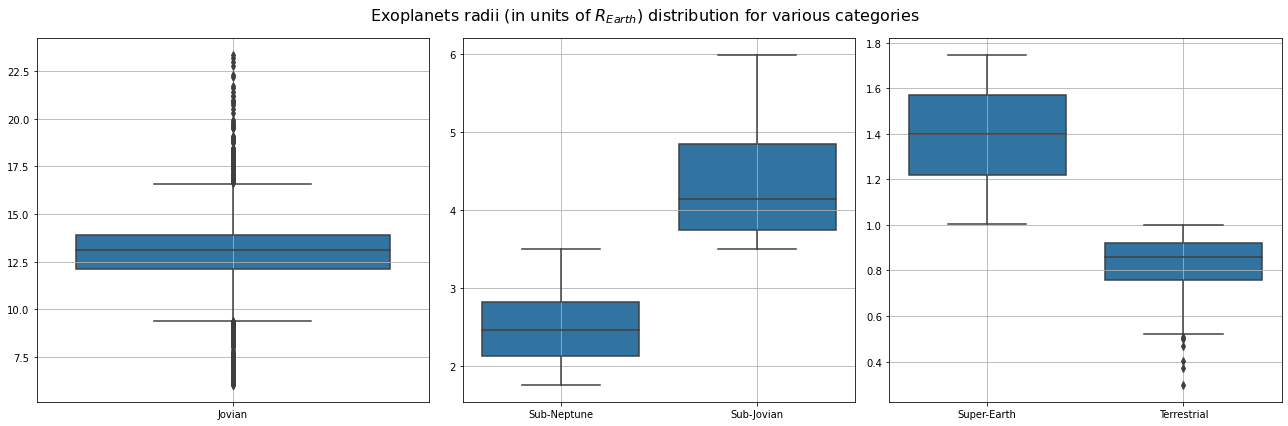

In [54]:
fig_box, axes_box = plt.subplots(nrows = 1, ncols = 3 , figsize=(18,6))

for i, item in enumerate(dataframe_box_plist):
    sns.boxplot(data = item, x = axes_box_plist[0], y = axes_box_plist[1], color="C0", ax = axes_box[i])
    axes_box[i].grid(True)
    axes_box[i].set_xlabel('')
    axes_box[i].set_ylabel('')



fig_box.suptitle(r'Exoplanets radii (in units of $R_{Earth}$) distribution for various categories', fontsize=16)
#fig_box.supylabel(r'$R_{Earth}$', fontsize = 16, x = 0.01)

plt.tight_layout()
plt.show()

Firstly, we see that large number of outliers are in the Jovians category, 
which is to be expected since this serve as the catch all category 
for exoplanets with radii bigger than 6 Earth radii. 
Median of exoplanetary radius for this category is around 13.5 Earth radii. 

Secondly, we see that for the Super-Earth and the Terrestrial exoplanets median for radii are 1.4 and 0.9 Earth radii respectively.
Moreover for the Super-Earth type sizes are evenly distribute in whole range while for the Terrestrial exoplanets 50% of them have radii in range 0.75 - 0.95.

In [55]:
df_to_table_prep = df_Exoplanet_restrict[['sy_snum', 'sy_dist', 'pl_type']].rename( columns = {'pl_type' : 'Exoplanet type'})
pt_sy_snum = pd.pivot_table(df_to_table_prep, values = 'sy_dist', index = ['sy_snum'], 
                       columns = ['Exoplanet type'], aggfunc = { 'sy_dist' : 'count'} )
pt_sy_snum.index.rename('No. of stars in system', inplace=True)

In [56]:
# Set colormap equal to seaborns light green color palette
#cm = sns.light_palette("green", as_cmap=True)
# format output for pivot_table
pt_sy_snum.fillna(0).style.set_caption('Count of systems containing confirmed exoplanets of given type').set_table_styles([{
    'selector': 'caption',
    'props': [('color', 'black'), 
              ('font-size', '16px'),
              ("font-weight", "bold")] } ]).format(precision = 0).background_gradient(cmap=cm, subset=['Terrestrial','Super-Earth'])

Exoplanet type,Jovian,Sub-Jovian,Sub-Neptune,Super-Earth,Terrestrial
No. of stars in system,,,,,
1,1094,316,1707,978,173
2,212,27,61,47,13
3,33,3,2,3,5
4,2,0,0,0,0


Count of systems containing confirmed exoplanets of given type
From the table above we may infer that most of confirmed exoplanets are in the single star systems, yet binary systems also contain non-negligible amount of them. This is especially interesting because stable orbits in such a system are more complicated than in the single star case.

In [57]:
num_of_rocky_exoplanbet_in_10pc = df_Exoplanet_restrict[((df_Exoplanet_restrict['pl_type'] == 'Terrestrial') | 
                      (df_Exoplanet_restrict['pl_type'] == 'Super-Earth')) &
                     (df_Exoplanet_restrict['sy_dist'] <= 10.0)].count()[0]
print(f"No. of confirmed Terrestrial and Super-Earth type exoplanets in 10 parsec radii: {num_of_rocky_exoplanbet_in_10pc}")

num_of_exoplanbet_in_10pc = df_Exoplanet_restrict[(df_Exoplanet_restrict['sy_dist'] <= 10.0)].count()[0]
print(f"No. of confirmed exoplanets in 10 parsec radii: {num_of_exoplanbet_in_10pc}")

No. of confirmed Terrestrial and Super-Earth type exoplanets in 10 parsec radii: 34
No. of confirmed exoplanets in 10 parsec radii: 84


In [58]:
#df_Exoplanet_restrict.columns
lucky_system_prop = ['pl_name', 'hostname', 'sy_snum', 'sy_pnum', 
                     'pl_rade', 'pl_orbper',
                     'st_rad', 'st_mass',
                     'sy_dist', 'pl_type']

human_readable_columns = {'pl_name' : 'Exoplanet name', 
                          'hostname' : 'Star name', 
                          'sy_snum' : 'Num of stars in system', 
                          'sy_pnum' : 'Num of confirmed planet in system', 
                          'pl_rade' : 'Exoplanet radii (in Earth radii)', 
                          'st_rad' : 'Star radii (in Solar radii)', 
                          'st_mass' : 'Star mass (in Solar masses)', 
                          'sy_dist' : 'Distance from Earth in pc', 
                          'pl_type' : 'Exoplanet type', 
                          'pl_orbper' : 'Orbital period in days'}

number_format_dic = {'Exoplanet radii (in Earth radii)' : "{:.2f}", 
                     'Orbital period in days' : "{:.1f}", 
                     'Star radii (in Solar radii)' : "{:.2f}", 
                     'Star mass (in Solar masses)' : "{:.2f}", 
                     'Distance from Earth in pc' : "{:.2f}"}

In [59]:
# 10 closest to Earth star systems containing rocky planet
df_lucky_planet_summary = df_Exoplanet_restrict[(df_Exoplanet_restrict['pl_type'].isin(['Terrestrial', 'Super-Earth'])) 
                      & (df_Exoplanet_restrict['sy_dist'] <= 10.0)].sort_values('sy_dist')[lucky_system_prop]
df_lucky_planet_summary.rename(columns = human_readable_columns, inplace = True)

In [60]:
arg_head = 10
df_lucky_planet_summary.reset_index().drop('index', axis = 1).head(arg_head).style.set_caption(
    f'{arg_head} closests star systems containing rocky exoplanets').set_table_styles([{
    'selector': 'caption',
    'props': [('color', 'black'), 
              ('font-size', '16px'),
              ("font-weight", "bold")] } ], overwrite = False).format(number_format_dic)

,Exoplanet name,Star name,Num of stars in system,Num of confirmed planet in system,Exoplanet radii (in Earth radii),Orbital period in days,Star radii (in Solar radii),Star mass (in Solar masses),Distance from Earth in pc,Exoplanet type
0,Ross 128 b,Ross 128,1,1,1.11,9.9,0.20,0.17,3.37,Super-Earth
1,GJ 15 A b,GJ 15 A,2,2,1.55,11.4,0.38,0.38,3.56,Super-Earth
2,tau Cet h,tau Cet,1,4,1.19,49.4,0.83,0.78,3.60,Super-Earth
3,tau Cet g,tau Cet,1,4,1.18,20.0,0.83,0.78,3.60,Super-Earth
4,GJ 1061 b,GJ 1061,1,3,1.10,3.2,0.16,0.12,3.67,Super-Earth
5,GJ 1061 d,GJ 1061,1,3,1.16,13.0,0.16,0.12,3.67,Super-Earth
6,GJ 1061 c,GJ 1061,1,3,1.18,6.7,0.16,0.12,3.67,Super-Earth
7,YZ Cet d,YZ Cet,1,3,1.03,4.7,0.16,0.14,3.71,Super-Earth
8,YZ Cet c,YZ Cet,1,3,1.05,3.1,0.16,0.14,3.71,Super-Earth
9,YZ Cet b,YZ Cet,1,3,0.91,2.0,0.16,0.14,3.71,Terrestrial


In [61]:
some_agg = df_Exoplanet_restrict.groupby('pl_type').agg({'pl_name' : 'count',  
                                              'pl_rade' : ['min' , 'mean', 'median', 'std','max'],
                                              'sy_dist' : ['min' , 'mean', 'median', 'std','max'],}).sort_values(('pl_name', 'count'))

names_for_agg_columns = {'pl_type' : 'Exoplanet type', 
                         'pl_name' : 'Exoplanet', 
                         'pl_rade' : 'Exoplanet radii', 
                         'sy_dist' : 'Distance from Earth', 
                         'sy_snum' : 'Number of star in system'}
some_agg.rename(columns = names_for_agg_columns, inplace = True)
some_agg.index.rename('Exoplanet type', inplace=True)

In [62]:
some_agg.style.set_caption('Summary of exoplanets statistics').set_table_styles({
    "Terrestrial" : [ { "selector" :"td", "props": [("background-color", "lightgreen")]}],
    'Super-Earth' : [ { "selector" :"td", "props": [("background-color", "lightgreen")]}]
}, axis = 1, ).set_table_styles([{
    'selector': 'caption',
    'props': [('color', 'black'), 
              ('font-size', '16px'),
              ("font-weight", "bold")] } ], overwrite = False).format({("Exoplanet radii", 'min' ): '{:.2f}', 
                                                                       ("Exoplanet radii", 'mean' ): '{:.2f}', 
                                                                       ("Exoplanet radii", 'median' ): '{:.2f}', 
                                                                       ("Exoplanet radii", 'std' ): '{:.2f}', 
                                                                       ("Exoplanet radii", 'max' ): '{:.2f}',
                                                                       ("Distance from Earth", 'min' ): '{:.2f}', 
                                                                       ("Distance from Earth", 'mean' ): '{:.2f}', 
                                                                       ("Distance from Earth", 'median' ): '{:.2f}', 
                                                                       ("Distance from Earth", 'std' ): '{:.2f}', 
                                                                       ("Distance from Earth", 'max' ): '{:.2f}'} )

Distance to the farthest rocky exoplanet discovered

In [63]:
rocky_planets = df_Exoplanet_restrict[(df_Exoplanet_restrict['pl_type'] == 'Terrestrial')].reset_index()
rocky_planets.drop('index', axis = 1, inplace = True)

# distance to farthest Rocky planet
#rocky_planets['sy_dist'].max()

# more detailed view of farthest Rocky exoplanet
index_of_farthes_rocky = rocky_planets['sy_dist'].idxmax()
rocky_planets.iloc[index_of_farthes_rocky]

pl_name                Kepler-1296 b
hostname                 Kepler-1296
sy_snum                            1
sy_pnum                            1
discoverymethod              Transit
disc_year                       2016
pl_orbper                   8.383987
pl_rade                         0.91
st_rad                          0.83
st_mass                         0.87
st_met                         -0.04
sy_dist                      1551.54
decade_of_discovery            2010s
pl_type                  Terrestrial
st_compactness              1.048193
Name: 53, dtype: object

In [64]:
describe_planet(rocky_planets.iloc[index_of_farthes_rocky])

Discovery year was 2016
Host star is Kepler-1296
Exoplanet was named Kepler-1296 b
System contains 1 star
There is 1 confirmed exoplanet in there
Host star has 0.87 mas of the Sun
System is 1551.54 parsecs [pc] from Sun
Planet has radius of 0.91 Earth radii
Its orbital period is 8.3839865 days
Exoplanet belongs to Terrestrial class


Above factsheet imply that we detected exoplanet that is slightly smaller than the Earth from distance of 1.5 kpc. This corresponds to distance
of roughly 5000 light years. This means that when the light we saw was emitted Egyptians just started to learn how to make paper from papyrus.

<font size = '5'> Some additional birds eye view of exoplanets and their host stars populations </font>

In [65]:
#df_Exoplanet_restrict.columns

In [66]:
# df_for_histplot = [df_Exoplanet_restrict, 
#                    df_Exoplanet_restrict[df_Exoplanet_restrict['st_mass'] < 6.0], 
#                    df_Exoplanet_restrict, 
#                    df_Exoplanet_restrict[df_Exoplanet_restrict['st_compactness'] < 10.0]
#                   ]

# hist_plot_list = ['pl_rade', 'st_mass', 'st_met', 'st_compactness']
# xlabel_list = ['Exoplanet radii', 'Star mass', 'Star metalicity', 'Star compactness']

In [67]:
# fig_hist, axes_hist = plt.subplots(nrows = 2, ncols = 2 , figsize=(16,8))


# for i, item in enumerate(hist_plot_list):
   
#     sns.histplot(data = df_for_histplot[i], x = item, color="C0", ax = axes_hist.flat[i])
#     axes_hist.flat[i].grid(True)
#     axes_hist.flat[i].set_xlabel(xlabel_list[i])
#     axes_hist.flat[i].set_ylabel('')

# plt.tight_layout()
# plt.show()

In [68]:
df_for_histplot_pl1 = [df_Exoplanet_restrict, 
                       df_Exoplanet_restrict[df_Exoplanet_restrict['pl_rade'] <= 4.0], 
                       df_Exoplanet_restrict[df_Exoplanet_restrict['pl_rade'] > 4.0] 
                      ]

hist_plot_list_pl1 = ['pl_rade']*3
xlabel_list_pl1 = ['Exoplanet radii']*3

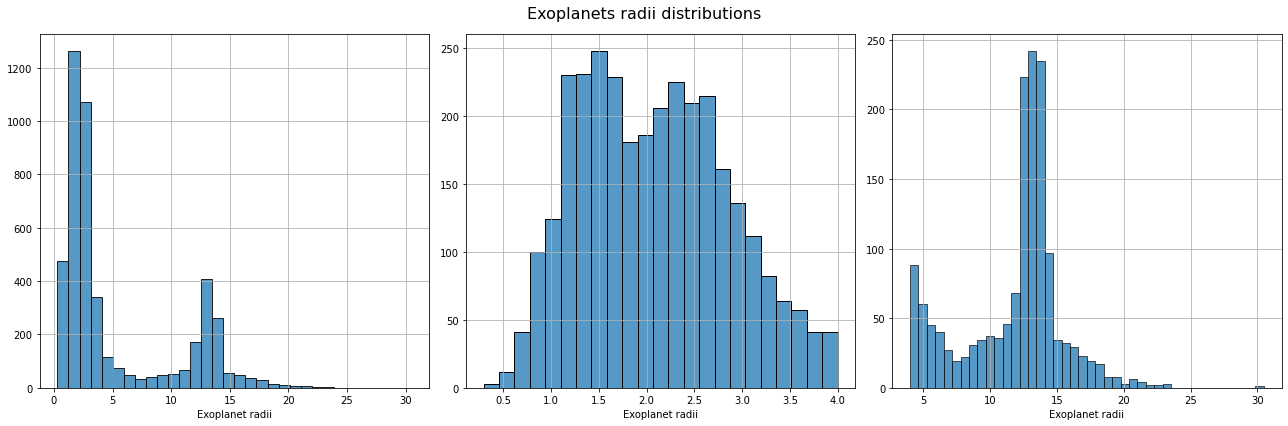

In [69]:
fig_hist_pl1, axes_hist_pl1 = plt.subplots(nrows = 1, ncols = 3 , figsize=(18,6))


for i, item in enumerate(hist_plot_list_pl1):
   
    sns.histplot(data = df_for_histplot_pl1[i], x = item, color="C0", ax = axes_hist_pl1[i])
    axes_hist_pl1[i].grid(True)
    axes_hist_pl1[i].set_xlabel(xlabel_list_pl1[i])
    axes_hist_pl1[i].set_ylabel('')

plt.suptitle('Exoplanets radii distributions', fontsize = 16)
plt.tight_layout()
plt.show()

From first plot we see that there is gap in exoplanets radii located roughly between 5 and 10 Earth radii. This is due to fact that we may segregate data into two main parts namely pre-Keppler and Keppler era. First exoplanets to be discovered, we may call them pre-Keppler’s era exoplanets, were the big Jovian like gas giants. Maximum of they radii distributions is around 12 Earth radii. 
The main goal of the Keppler space telescope mission was to hunt down Earth like exoplanets whose radii are in 0-4 Earth radii range. 
On the second plot we see closeup of this exoplanets group. Interestingly we see a gap around 2 Earth radii which is called the 'Fulton gap' or the 'Neptunian Desert' (see for example https://iopscience.iop.org/article/10.3847/1538-3881/aa80eb).
This is region of radii - orbital period parameters space for which there is significant lack of Neptune size objects, and its root cause is believed to be the interaction among host star and Neptune sized object on close orbits.

In [70]:
df_for_scatter_pl1 = [df_Exoplanet_restrict[(df_Exoplanet_restrict['pl_rade'] < 15) & (df_Exoplanet_restrict['pl_orbper'] < 4)], 
                      df_Exoplanet_restrict[(df_Exoplanet_restrict['pl_rade'] < 15) & 
                                            ((df_Exoplanet_restrict['pl_orbper'] > 4) & (df_Exoplanet_restrict['pl_orbper'] < 100))] ]


scatter_plot_y_pl1 = ['pl_orbper']*2
scatter_plot_x_pl1 = ['pl_rade']*2

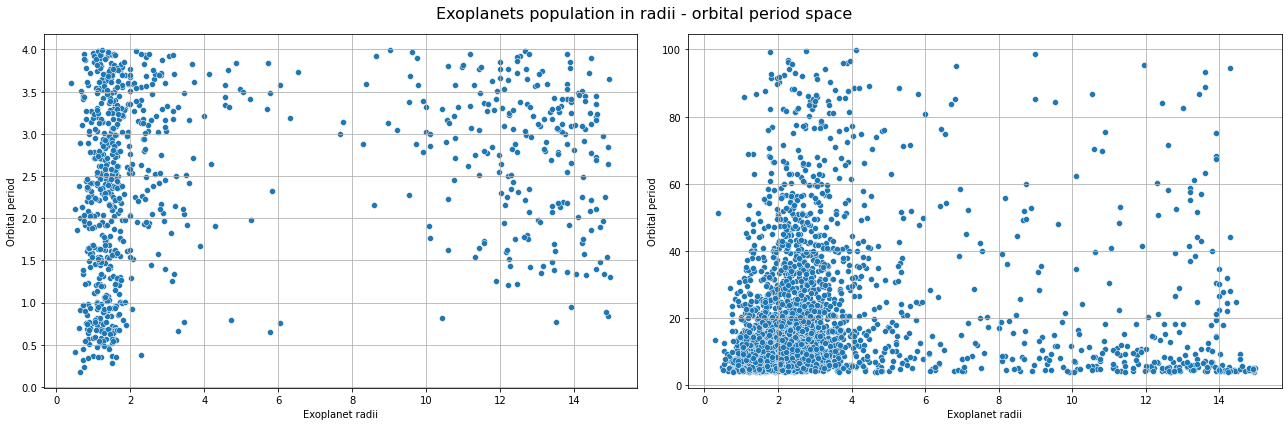

In [71]:
fig_scatter_pl1, axes_scatter_pl1 = plt.subplots(nrows = 1, ncols = 2 , figsize=(18,6))


for i, item in enumerate(scatter_plot_x_pl1):
   
    sns.scatterplot(data = df_for_scatter_pl1[i], x = item, y = scatter_plot_y_pl1[i] , color="C0", ax = axes_scatter_pl1[i])
    axes_scatter_pl1[i].grid(True)
    axes_scatter_pl1[i].set_xlabel('Exoplanet radii')
    axes_scatter_pl1[i].set_ylabel('Orbital period')

plt.suptitle('Exoplanets population in radii - orbital period space', fontsize = 16)
plt.tight_layout()
plt.show()

At first plot we see gap in exoplanets population for radii in between 4-10 Earth radii and for orbital periods below 3 days. This is aforementioned 'Neptunian Desert'.
On the second plot we see that in the same radii range, but for large orbital period there is no gap in exoplanets population.

In [72]:
df_for_histplot = [df_Exoplanet_restrict[df_Exoplanet_restrict['st_mass'] < 6.0], 
                   df_Exoplanet_restrict, 
                   df_Exoplanet_restrict[df_Exoplanet_restrict['st_compactness'] < 10.0]
                  ]

hist_plot_list = ['st_mass', 'st_met', 'st_compactness']
xlabel_list = ['Star mass', 'Star metalicity', 'Star compactness']

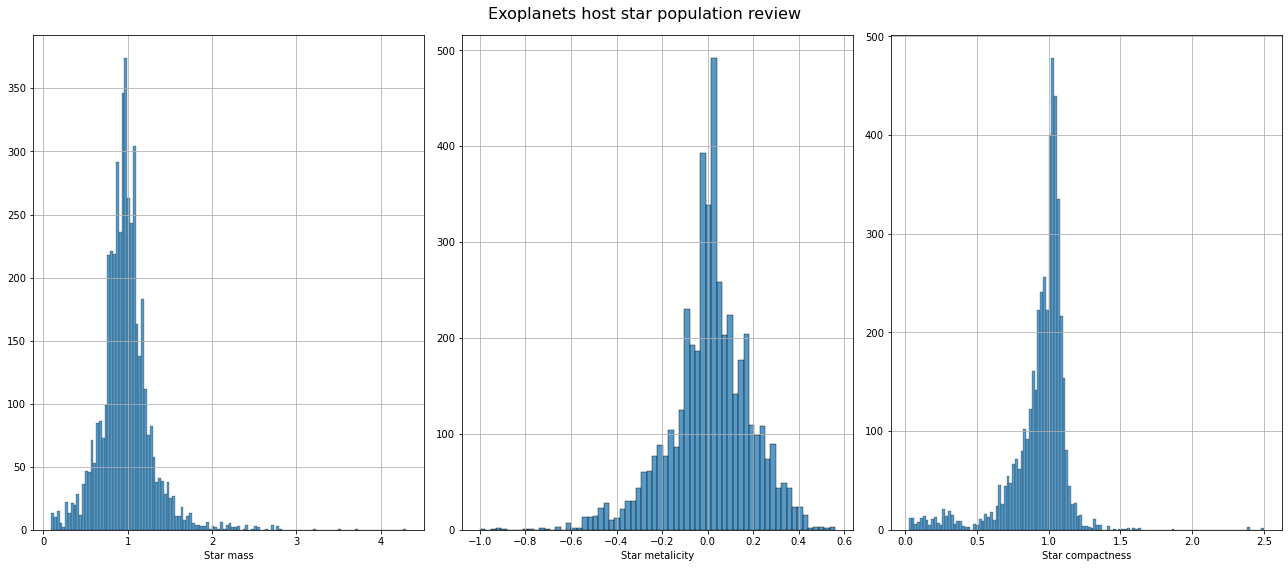

In [73]:
fig_hist, axes_hist = plt.subplots(nrows = 1, ncols = 3 , figsize=(18,8))


for i, item in enumerate(hist_plot_list):
   
    sns.histplot(data = df_for_histplot[i], x = item, color="C0", ax = axes_hist[i])
    axes_hist[i].grid(True)
    axes_hist[i].set_xlabel(xlabel_list[i])
    axes_hist[i].set_ylabel('')

plt.suptitle('Exoplanets host star population review', fontsize = 16)
plt.tight_layout()
plt.show()

From plots above we see that host stars of confirmed exoplanets are normally distributed around points in parameter space representing Sun like object.
This is star with mas around 1 solar mass and by definition compactness of Sun is 1 and metallicity is 0. Since all of these variables are normally distributed we may look for correlations among them.

<AxesSubplot:>

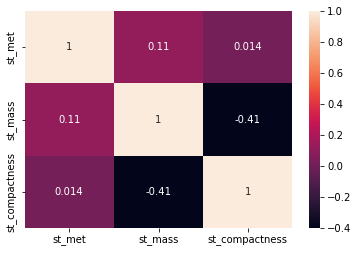

In [74]:
sns.heatmap(df_Exoplanet_restrict[['st_met', 'st_mass', 'st_compactness']].corr(), annot = True)

In [75]:
# # Map to upper,lower, and diagonal
# st_grid = sns.PairGrid(df_Exoplanet_restrict[['st_met', 'st_mass', 'st_compactness']], height = 4)
# st_grid.map_diag(plt.hist)
# st_grid.map_upper(plt.scatter)
# st_grid.map_lower(sns.kdeplot)

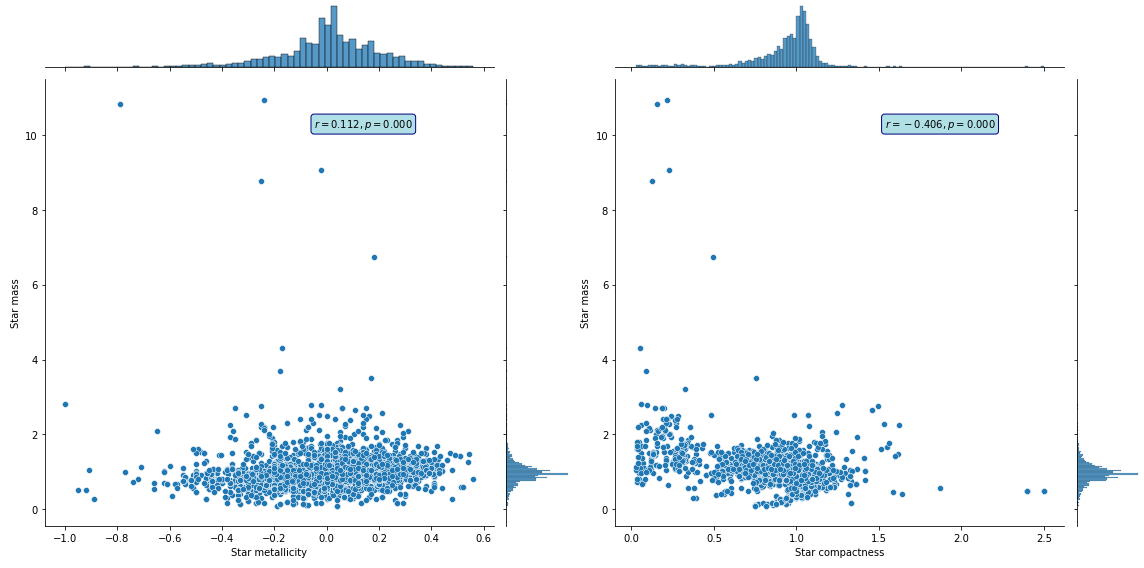

In [76]:
import itertools 
import matplotlib.gridspec as gridspec

nvars=['st_met', 'st_compactness']
rt=['st_mass']
xname = ['Star metallicity', 'Star compactness']

# A JointGrid
fig = plt.figure(figsize=(16,8))
gs = gridspec.GridSpec(len(rt),len(nvars))

for i, idxs in enumerate(itertools.product(rt, nvars)):
    nrt, nvar = idxs
    g=sns.jointplot(x=nvar, y = nrt, data = df_Exoplanet_restrict)#, space=0,ax=axs[idx_rt,idx_var])
    r, p = stats.pearsonr(df_Exoplanet_restrict[nrt], df_Exoplanet_restrict[nvar])
    g.ax_joint.annotate(f'$r = {r:.3f}, p = {p:.3f}$',
      xy=(0.6, 0.9), xycoords='axes fraction',
      ha='left', va='center',
      bbox={'boxstyle': 'round', 'fc': 'powderblue', 'ec': 'navy'})
    g.ax_joint.set_xlabel(xname[i])
    g.ax_joint.set_ylabel('Star mass')
    mg = SeabornFig2Grid(g, fig, gs[i])

gs.tight_layout(fig)
#gs.update(top=0.7)

plt.show()

From the left plot we see that we have weak correlation between star metallicity and its mass. On the other hand, from the right one we infer that correlation between star compactness ($C_{Star}$) and mass is moderate and negative. Therefore, increase in mass, when we keep everything else constant lead to the decrease of the compactness factor. Since we know that $C_{Star} = \frac{M_{Star}}{R_{Star}}$ this is sensible result.

Text(45.0, 0.5, 'Star compactness')

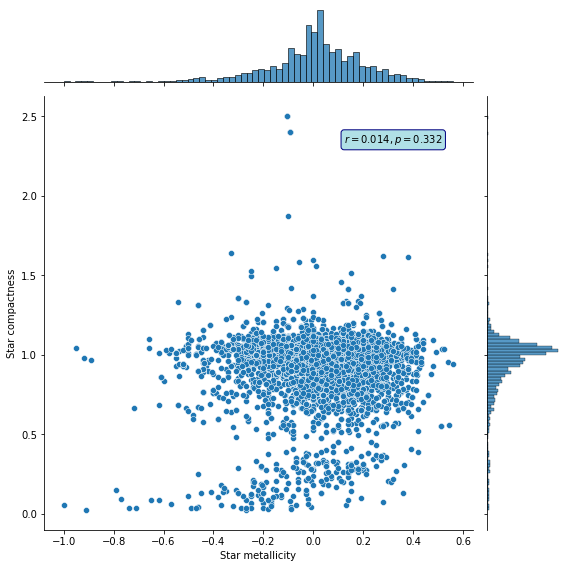

In [77]:
graph = sns.jointplot(x = 'st_met', y = 'st_compactness', data = df_Exoplanet_restrict, height = 8)
r, p = stats.pearsonr(df_Exoplanet_restrict['st_compactness'], df_Exoplanet_restrict['st_met'])

graph.ax_joint.annotate(f'$r = {r:.3f}, p = {p:.3f}$',
                    xy=(0.7, 0.9), xycoords='axes fraction',
                    ha='left', va='center',
                    bbox={'boxstyle': 'round', 'fc': 'powderblue', 'ec': 'navy'})
graph.ax_joint.set_xlabel('Star metallicity')
graph.ax_joint.set_ylabel('Star compactness')


From above plot we may infer that at any typical confidence levels there is no correlation among star metallicity and its compactness.

# Is there difference in average metallicity of the stars harboring gas giants and those that host only small planets?

Null hypothesis $H_{0}$: there is no difference in the average metallicity of stars hosting rocky worlds and gas giants

Alternative hypothesis $H_{1}$: mean metallicity in stars populations hosting rocky worlds differ from that for the ones harboring gas giants


Samples preparation

In [78]:
# systems containing large exoplanets
df_Large_radii = df_Exoplanet_restrict[df_Exoplanet_restrict['pl_rade'] > 4.0]['st_met']

In [79]:
# list of unique systems names
count_uniq_systems_Large = df_Exoplanet_restrict[df_Exoplanet_restrict['pl_rade'] > 4.0]['hostname'].unique()

In [80]:
# systems containing small exoplanets
df_Small_radii = df_Exoplanet_restrict[df_Exoplanet_restrict['pl_rade'] <= 4.0]['st_met']

In [81]:
# selecting systems that contain both small and large exoplanets
systems_with_small_and_large = df_Exoplanet_restrict[(df_Exoplanet_restrict['pl_rade'] <= 4.0) & 
                      (df_Exoplanet_restrict['hostname'].isin(count_uniq_systems_Large))]['hostname']
systems_with_small_and_large.count()

196

In [82]:
# remove systems that contains both big and small planets
df_Small_radii_clear = df_Exoplanet_restrict[(df_Exoplanet_restrict['pl_rade'] <= 4.0) & (~df_Exoplanet_restrict['hostname'].isin(systems_with_small_and_large))]

<AxesSubplot:xlabel='st_met', ylabel='Count'>

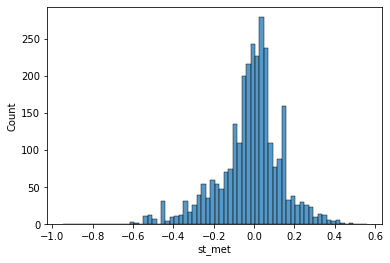

In [83]:
# visual check for normal distribution of the sample
sns.histplot(data = df_Small_radii_clear, x = 'st_met')

In [84]:
# remove systems that contains both big and small planets
df_Large_radii_clear = df_Exoplanet_restrict[(df_Exoplanet_restrict['pl_rade'] > 4.0) & (~df_Exoplanet_restrict['hostname'].isin(systems_with_small_and_large))]

<AxesSubplot:xlabel='st_met', ylabel='Count'>

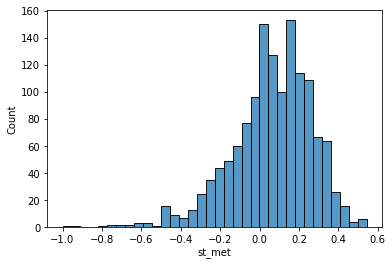

In [85]:
# visual check for normal distribution of the sample
sns.histplot(data = df_Large_radii_clear, x = 'st_met')

In [86]:
# average metallicity for stars with gas giants
df_Large_radii_clear['st_met'].mean()

0.05968835864063639

In [87]:
# standard deviation
df_Large_radii_clear['st_met'].std()

0.20724533425183891

In [88]:
# average metallicity for stars with small planets
df_Small_radii_clear['st_met'].mean()

-0.018824430078258084

In [89]:
# standard deviation
df_Small_radii_clear['st_met'].std()

0.1602757870427037

Hypothesis testing -- calculating p-value

In [90]:
t_value,p_value=stats.ttest_ind(df_Large_radii_clear['st_met'],df_Small_radii_clear['st_met'])

print(f'Test statistic is {t_value:.3f}')

print(f'p-value for two tailed test is {p_value:.3f}')

alpha = 0.05

Test statistic is 13.629
p-value for two tailed test is 0.000


Obtained p-value indicate that the null hypothesis is false, therefore there is statistically significant difference in the average metallicity for stars hosting gas giants and small exoplanets.